# Patient charges || clustering and regression

### The impact of Medicine to your wallet

### Importing libraries



In [76]:
import numpy as np
import pandas as pd

# Matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Plotly packages
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import pearsonr
from scipy import stats

# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv('../data/raw/insurance.csv')
df.head()

# lest's store the original dataframe in another variable
original_df = df.copy()

In [78]:
%matplotlib inline
sns.set_style(style = 'whitegrid')
sns.set_context(context = 'notebook')
plt.rcParams['figure.figsize'] = (11,9.4)

### Distribution of Medical Charges
* **Types of Distribution**: We have a **right skewed distribution** in wich most patients are being charge between 20000 - 12000.

* **Using Logarithms**: Logarithms helps us have a **normal distribution** which could help us in concepts of different ways such as outlier detection, implementation of statistical concepts based on the central limit theorem and for our predictive modell in the foreseen future. (We will come to this later in the kernel)

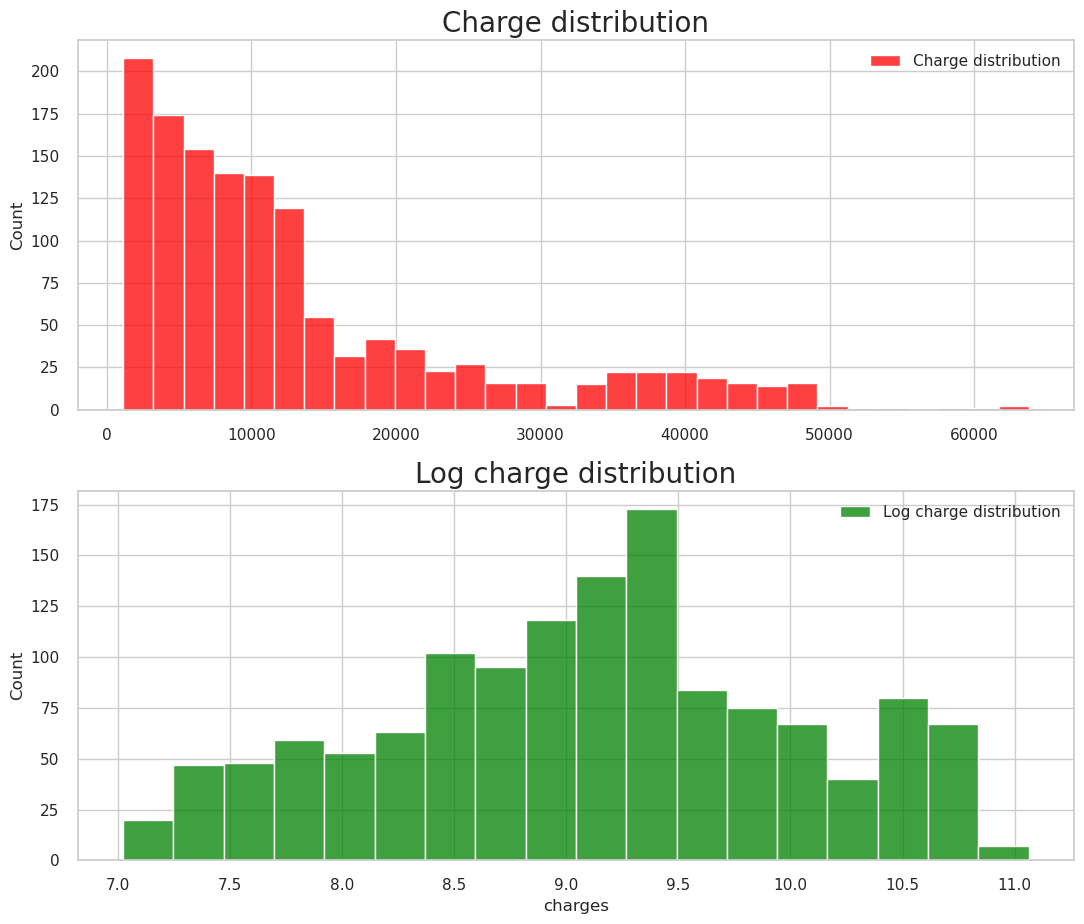

In [79]:
# Determine the distribution of charge 
charge_dist = df['charges'].values
logcharge = np.log(df['charges'])

fig,(ax1,ax2) = plt.subplots(2,1) 

sns.histplot(charge_dist, ax = ax1, color='red', label='Charge distribution') 
ax1.set_title('Charge distribution', fontsize = 20)
ax1.legend(loc='upper right')

sns.histplot(logcharge, ax = ax2, color='green', label='Log charge distribution')
ax2.set_title('Log charge distribution', fontsize = 20)
ax2.legend(loc='upper right')


plt.tight_layout()


### Age Analysis: 

Turning Age into Categorical Variable: 
* **Young Adult**: from 18 - 35
* **Senior Adutl**: from 36 - 55
* **Elder**: 56 or older
* **Share of each category**: Young Adults (42.9%), Senior Adults(41%) and older (16.1%)

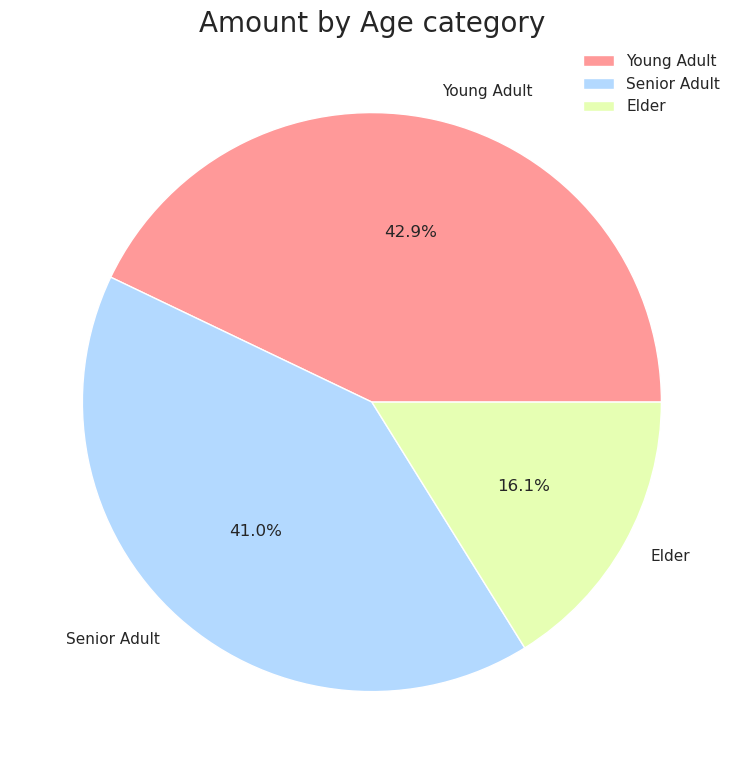

In [80]:
df['age_cat'] = (
    df['age']
    .apply(
        lambda x: 'Young Adult' if 18 <=  x <= 35 else 'Senior Adult' if 35 < x <= 55 else 'Elder'
    )
)

labels = df['age_cat'].unique().tolist()
amount = df['age_cat'].value_counts().tolist()

colors= ["#ff9999", "#b3d9ff", "#e6ffb3"]

plt.pie(amount, labels = labels, autopct = '%1.1f%%', colors=colors);
plt.title('Amount by Age category', fontsize = 20);
plt.legend(loc='upper right');


### Is there a Relationship between BMI and Age
* **BMI frequency**: Most of the BMI frequency is concentrated between 27-33.
* **Correlations**: Age and charges have a correlation of 0.29 while bmi and charges have a correlation of 0.19
* **Relationship between BMI and Age**: The correlation for these two variables is 0.10 which is not that great. Therefore, we can disregar that age has a huge influence on BMI.

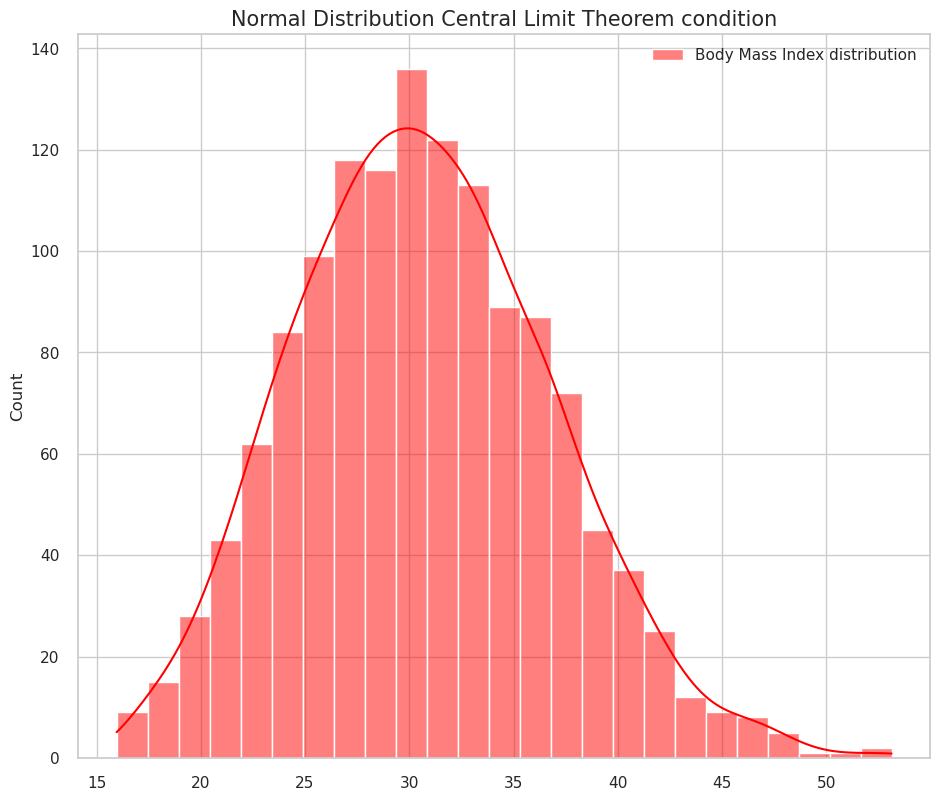

In [81]:
bmi = df['bmi'].values.tolist()

sns.histplot(
    bmi, 
    color='red', 
    kde=True,  
    label='Body Mass Index distribution'
);
plt.title('Normal Distribution Central Limit Theorem condition', fontsize = 15);
plt.legend(loc='upper right');

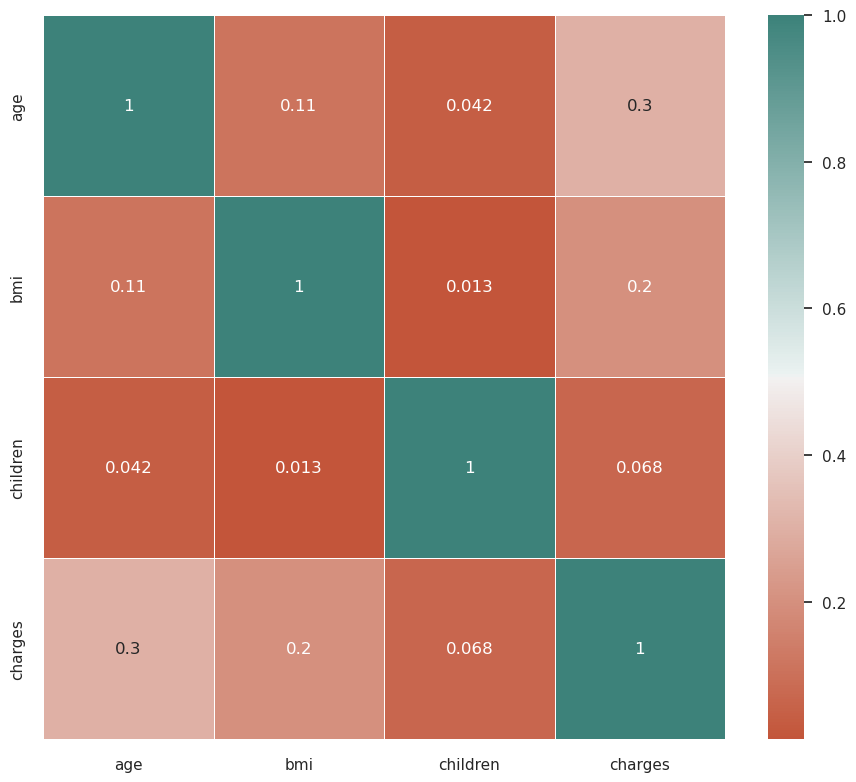

In [82]:

sns.heatmap(
    df.corr(numeric_only=True), 
    annot=True, 
    linewidths=0.5, 
    cmap=sns.diverging_palette(20,180, as_cmap=True),
    linecolor='white'
);

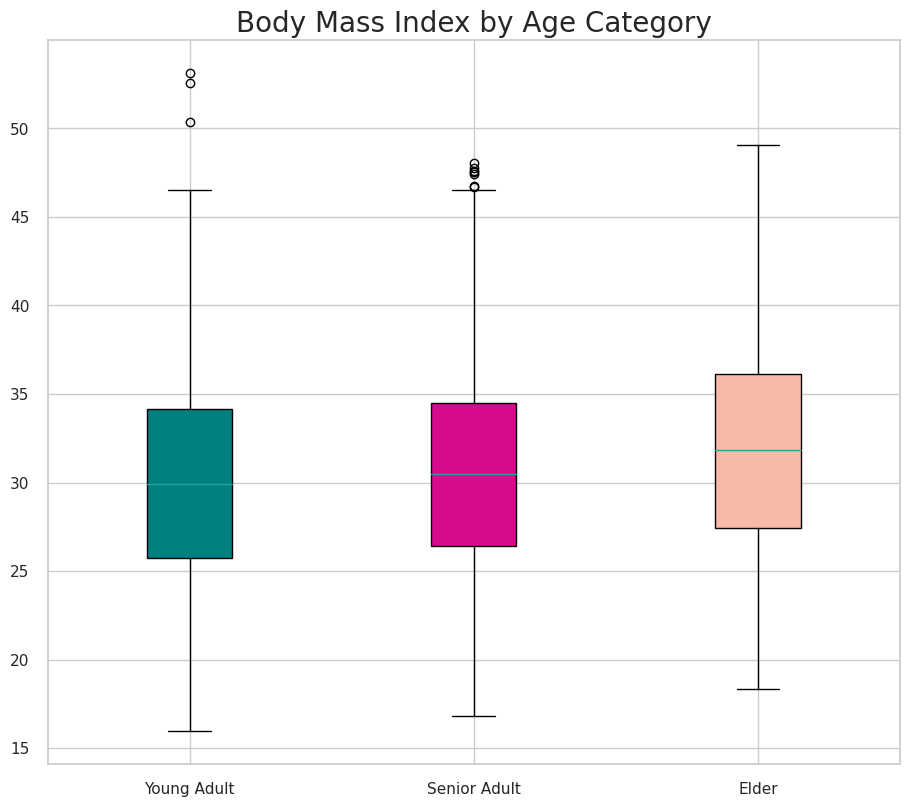

In [83]:
young_adults = df['bmi'].loc[df['age_cat'] == 'Young Adult'].values
senior_adults = df['bmi'].loc[df['age_cat'] == 'Senior Adult'].values
elders = df['bmi'].loc[df['age_cat'] == 'Elder'].values

data_to_plot = [young_adults, senior_adults, elders]
labels = ['Young Adult', 'Senior Adult', 'Elder']

colors = [(0/255, 128/255, 128/255), (214/255, 12/255, 140/255), (247/255, 186/255, 166/255)]

fig, ax = plt.subplots()

bp=ax.boxplot(data_to_plot, labels=labels, patch_artist=True);
plt.title('Body Mass Index by Age Category', fontsize = 20);


for box, color in zip(bp['boxes'], colors):
    box.set_facecolor(color)

### Comparing independent categorical Variables (ANOVA)
* **P-value:** The p-value being heigher than 0.05 tell us that we take the Null hypothesis, meaning that there is no a significant change between the three age categories when it come to Body Mass Index.

In [84]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

(
    ols(
        formula='bmi ~ age_cat',
        data=df
    )
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Thu, 06 Jun 2024   Prob (F-statistic):            0.00268
Time:                        16:28:51   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  31.7393      0.413     76.776      0.000      30.928      32.550
age_cat[T.Senior Adult]    -0.9202      0.488     -1.885      0.060      -1.878       0.037
age_cat[T.Young Adult]     -1.6295      0.485     -3.360      0.001      -2.581      -0.678
==============================================================================
Omnibus:                       19.635   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.284
Skew:                           0.301   Prob(JB):                     3.94e-05
Kurtosis:                       2.981   Cond. No.                         5.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
df

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior Adult
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult


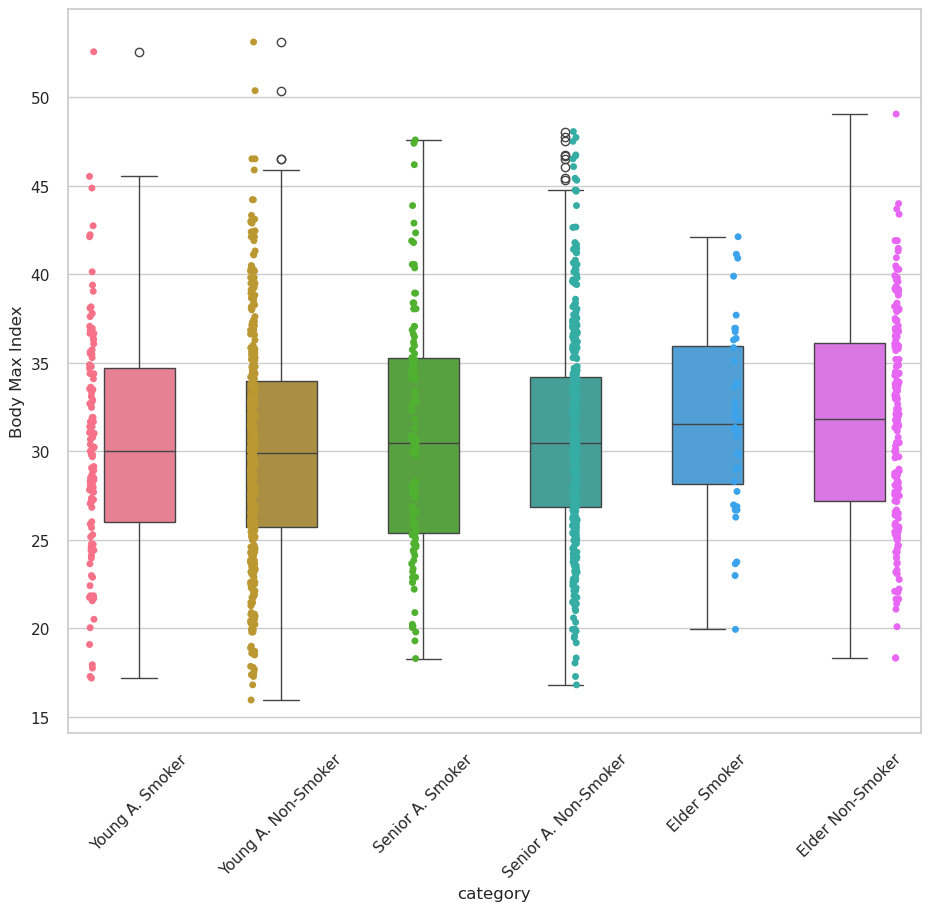

In [86]:
ya_smoker = df['bmi'].loc[(df['age_cat'] == 'Young Adult') & (df['smoker']== 'yes')].values
sa_smoker = df['bmi'].loc[(df['age_cat'] == 'Senior Adult') & (df['smoker']== 'yes')].values
e_smoker = df['bmi'].loc[(df['age_cat'] == 'Elder') & (df['smoker']== 'yes')].values

ya_nonsmoker = df['bmi'].loc[(df['age_cat'] == 'Young Adult') & (df['smoker']== 'no')].values
sa_nonsmoker = df['bmi'].loc[(df['age_cat'] == 'Senior Adult') & (df['smoker']== 'no')].values
e_nonsmoker = df['bmi'].loc[(df['age_cat'] == 'Elder') & (df['smoker']== 'no')].values

categories = ['Young A. Smoker', 'Young A. Non-Smoker', 'Senior A. Smoker', 'Senior A. Non-Smoker', 'Elder Smoker', 'Elder Non-Smoker']

y0 = ya_smoker
y1 = ya_nonsmoker
y2 = sa_smoker
y3 = sa_nonsmoker
y4 = e_smoker
y5 = e_nonsmoker

values = [y0, y1, y2, y3, y4, y5]

df_plot = pd.DataFrame()

for category, value in zip(categories, values):
    df_temp = pd.DataFrame({'category': category, 'Body Max Index': value})
    df_plot = pd.concat([df_plot, df_temp])



sns.boxplot(data = df_plot, x='category', y='Body Max Index', width=0.5,palette='husl' );
plt.xticks(rotation=45);
sns.stripplot(data = df_plot, x='category', y='Body Max Index', palette='husl', dodge=True);


### Who got charged more on Avarage by Age?
* **Patient Charge Mean**: For **Young adults** it is 7,944, for **Senior Adults** it is 14,785 and for the **elder** it is 18,795

* **Patient Charge Median** For **Young adults** it is 4,252, for **Senior Adults** it is 9,565 and for the **elder** it is 13,429

* **Mean and the Median**: Sometimes we must be careful when using the mean since it is prone to be affected by outliers. 

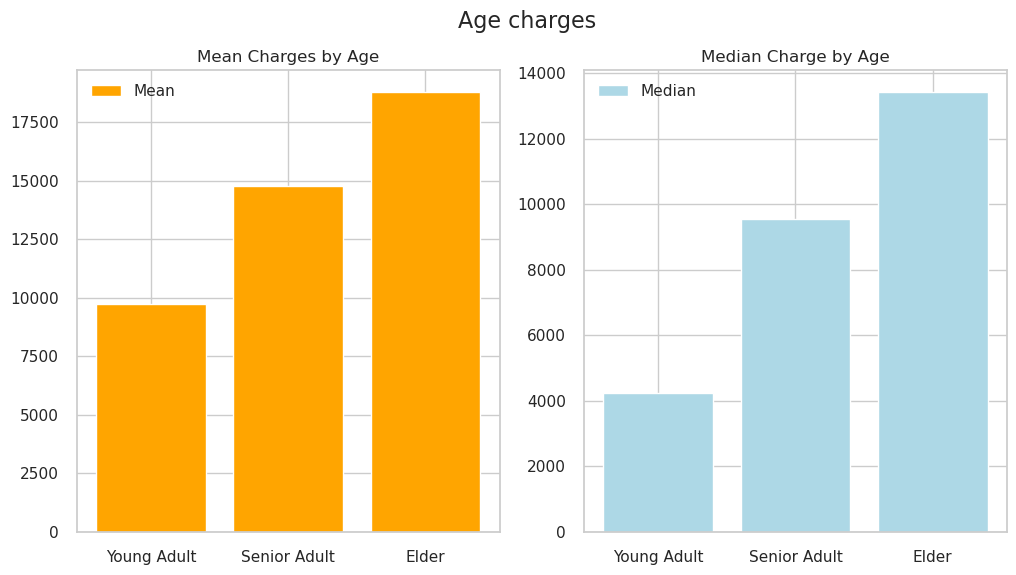

In [87]:
# Mean could be affected easily bt outliers or extreme cases.

# Means
avg_ya_charge = df['charges'].loc[df['age_cat'] == 'Young Adult'].mean()
avg_sa_charge  = df['charges'].loc[df['age_cat'] == 'Senior Adult'].mean()
avg_e_charge  = df['charges'].loc[df['age_cat'] == 'Elder'].mean()

# Medians

med_ya_charge = df['charges'].loc[df['age_cat'] == 'Young Adult'].median()
med_sa_charge = df['charges'].loc[df['age_cat'] == 'Senior Adult'].median()
med_e_charge  = df['charges'].loc[df['age_cat'] == 'Elder'].median()

categories = ['Young Adult', 'Senior Adult', 'Elder']
values_mean = [avg_ya_charge, avg_sa_charge, avg_e_charge]
values_median = [med_ya_charge, med_sa_charge, med_e_charge]

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
fig.suptitle('Age charges', fontsize = 16) 

ax1.bar(categories, values_mean, color='#FFA500',label='Mean');
ax1.set_title('Mean Charges by Age', fontsize = 12);
ax1.legend(loc='upper left');


ax2.bar(categories, values_median, color='lightblue', label='Median');
ax2.set_title('Median Charge by Age');
ax2.legend(loc='upper left');



### Weight Status

[Body Weight and Cancer Risk](https://www.cancer.org/cancer/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html)

Turning BMI into categorical variables: 
* **Under Weight**: Body Mass Index (BMI) < 18.5
* **Normal weight**: Body Mass Index (BMI) >= 18.5 and Body Mass Index (BMI) < 24.9
* **Overweight**: Body Mass Index (BMI) >= 25 and Body Mass Index (BMI) < 29.9
* **Obese**: Body Mass Index (BMI) > 30

In [88]:
df['weight_condition'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['bmi'] < 18.5, 'weight_condition'] = 'Underweight'
    col.loc[(col['bmi'] >= 18.5) & (col['bmi'] < 24.986), 'weight_condition'] = 'Normal Weight'
    col.loc[(col['bmi'] >= 25) & (col['bmi'] < 29.926), 'weight_condition'] = 'Overweight'
    col.loc[col['bmi'] >= 30, 'weight_condition'] = 'Obese'

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


Text(0.5, 1.0, 'Relationship between Smokers and Charges')

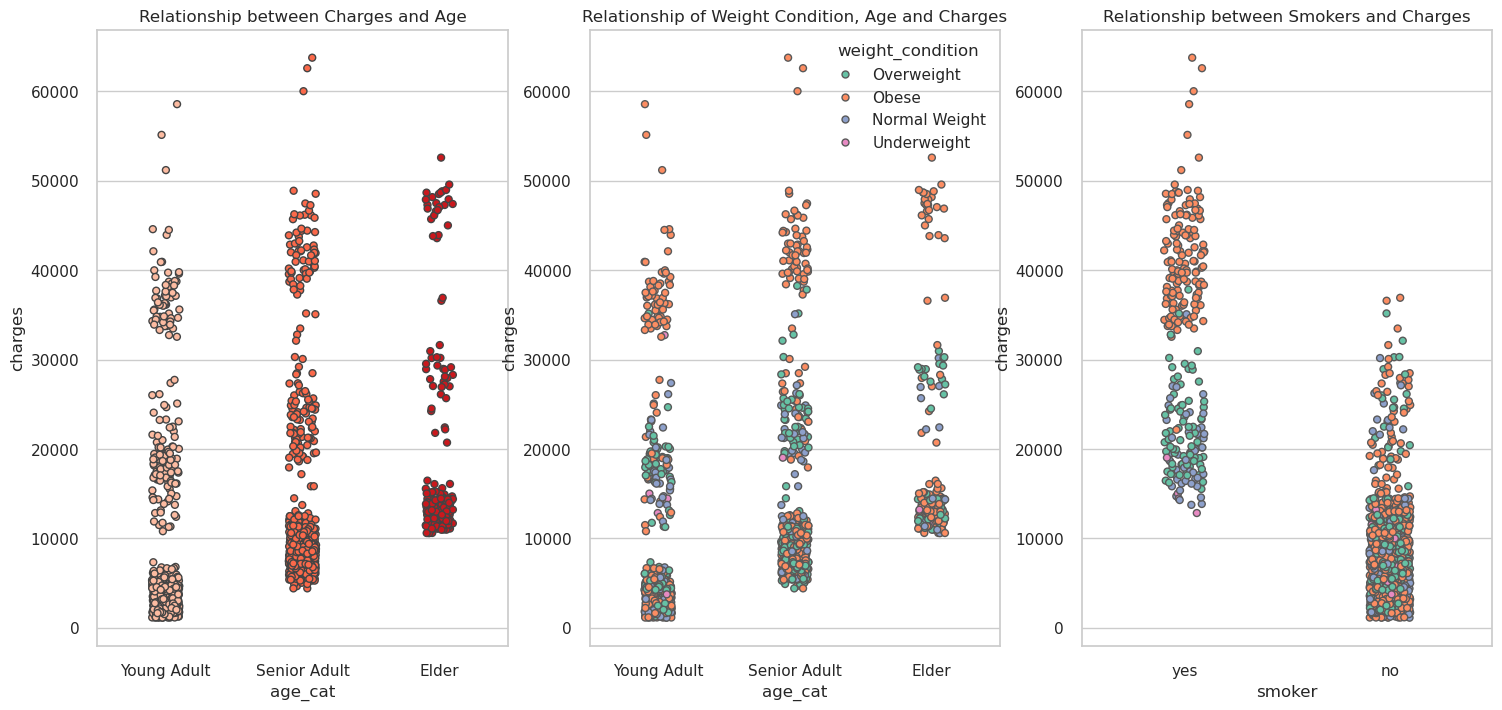

In [89]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,8))

# I wonder if the cluster that is on the top is from obese people
sns.stripplot(
    data=df,
    x='age_cat', 
    y='charges', 
    ax=ax1, 
    linewidth=1, 
    palette='Reds'
)
ax1.set_title('Relationship between Charges and Age')

sns.stripplot(
    data=df,  
    ax=ax2, 
    x='age_cat', 
    y='charges', 
    hue='weight_condition', 
    linewidth=1, 
    palette='Set2'
)
ax2.set_title('Relationship of Weight Condition, Age and Charges')

sns.stripplot(
    x='smoker',
    y='charges',
    hue='weight_condition',
    data=df,
    ax=ax3,
    linewidth=1,
    palette='Set2'
)
ax3.legend_.remove()
ax3.set_title('Relationship between Smokers and Charges')

In [90]:
# Make sure we don't have any null values

df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition


### Weight status vs Charges

* **Overweight**: Notice how there are two groups of people that get significantly charged more than the other group of overweight people.
* **Obse**: Same thing goes with the obese group, were a significant group is charged more than the other group.

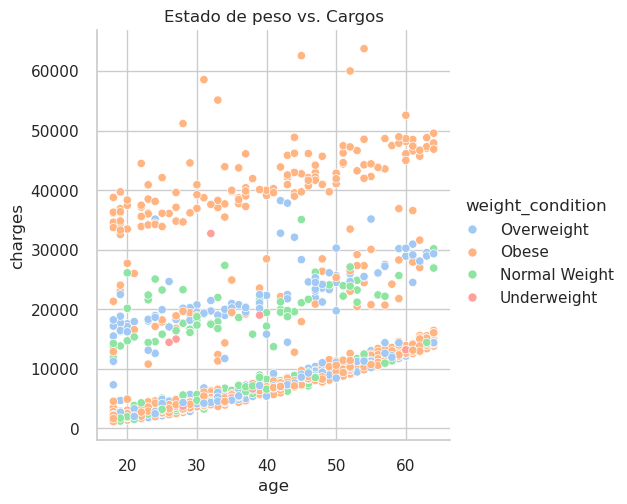

In [91]:
with sns.color_palette("pastel"):
    sns.relplot(
        data=df,
        x='age',
        y='charges',
        hue='weight_condition',
        height=5,  
        aspect=1  
    )
    plt.title('Estado de peso vs. Cargos')

In [92]:
# First find the average or median of the charges obese people paid. 

obese_avg = df['charges'].loc[df['weight_condition'] == 'Obese'].mean()

df['charge_status'] = np.nan

lst = [df]

for col in lst:
    col.loc[col['charges'] > obese_avg, 'charge_status'] = 'Above Average'
    col.loc[col['charges'] < obese_avg, 'charge_status'] = 'Below Average'

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,charge_status
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,Above Average
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese,Below Average
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese,Below Average
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight,Above Average
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight,Below Average


In [93]:
# No nulls
df['charge_status'].isnull().sum()

0

### Obesity and the impact of smoking to the wallet: 
* Notice in the **charges** box how smoking looks to have a cartain impact on medical costs.
* Lest's find out how much of a difference there is between the group of obese patients that smoke compared to the group of obese patients that don't smoke.

Text(0.5, 1.0, 'Smokers')

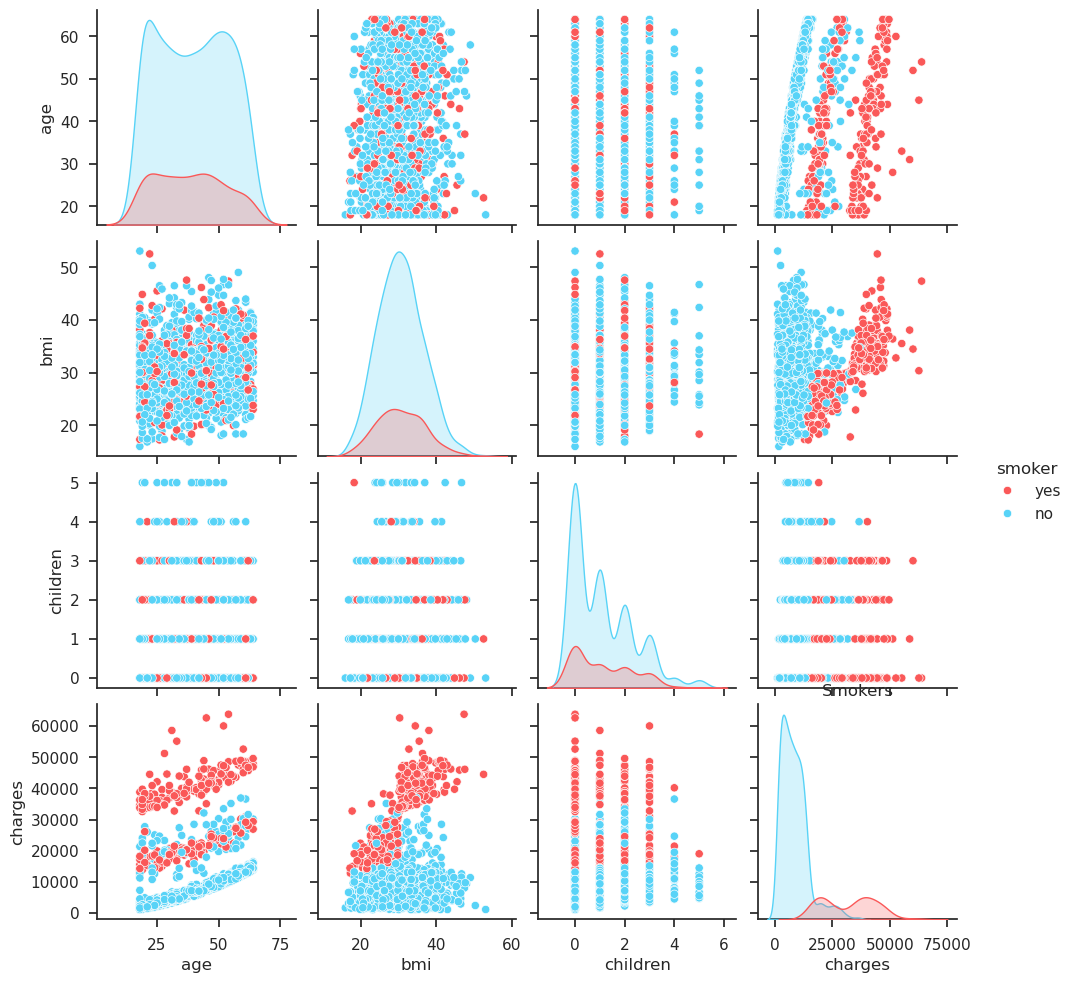

In [94]:
sns.set_style('ticks')
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue='smoker', palette=pal)
plt.title('Smokers')

In [95]:
# what percentage of obese that smoked paid above avarage from the total obese patients?
# 79% of obese were non-smokers while 21% were smokers

total_obese = len(df.loc[df['weight_condition'] =='Obese'])

obese_smoker_prop = len(df.loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'yes')]) / total_obese

obese_smoker_prop = round(obese_smoker_prop, 2)
print(obese_smoker_prop)

obese_nonsmoker_prop = len(df.loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'no')]) / total_obese

obese_nonsmoker_prop = round(obese_nonsmoker_prop, 2)
print(obese_nonsmoker_prop)
# Average charge by obese_smokers and obese_nonsmokers

# (df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")])

0.21
0.79


### Distribution of charges (Obese Smoker vs Obese non-smoker)

* **Violin Plots**: We will be using violing plots to compare the distribution of patients of **the obese group who are smokers and non-smokers.**
* **Obese smokers distribution**: Most obese smokers pay aroung 40k in medical costs!
* **Obese non-smoker distribution**: Most obese non-smokers pay 8k in medical costs.
* **Smoking a factor to the wallet**: Smoking is definitely a big factor for obese patients when it comes to medical cost. A difference of more than 30k!

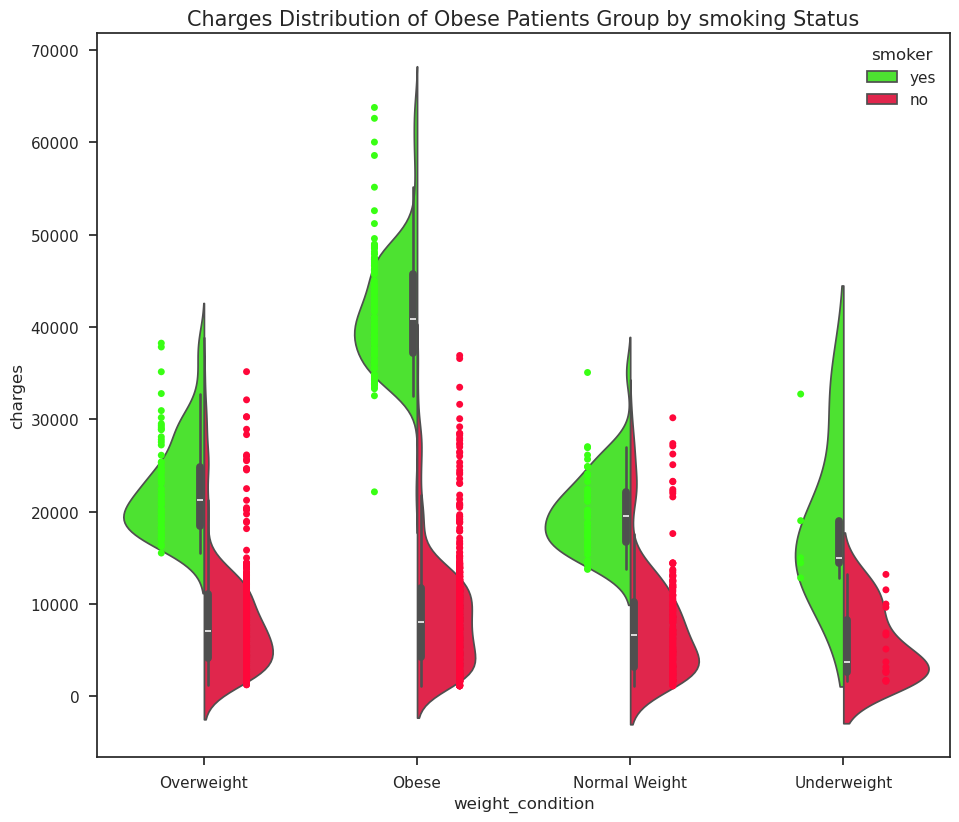

In [96]:
custom_palette = {
    'yes': '#39FF14',  
    'no': '#FF073A'
}


sns.violinplot(
    x='weight_condition',
    y='charges',
    hue='smoker',
    data=df,
    palette=custom_palette,
    split=True
);

plt.title('Charges Distribution of Obese Patients Group by smoking Status', size = 15);

sns.stripplot(
    x='weight_condition',
    y='charges',
    hue='smoker',
    data=df,
    palette=custom_palette,
    dodge=True,
    jitter=False,
);

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='smoker');

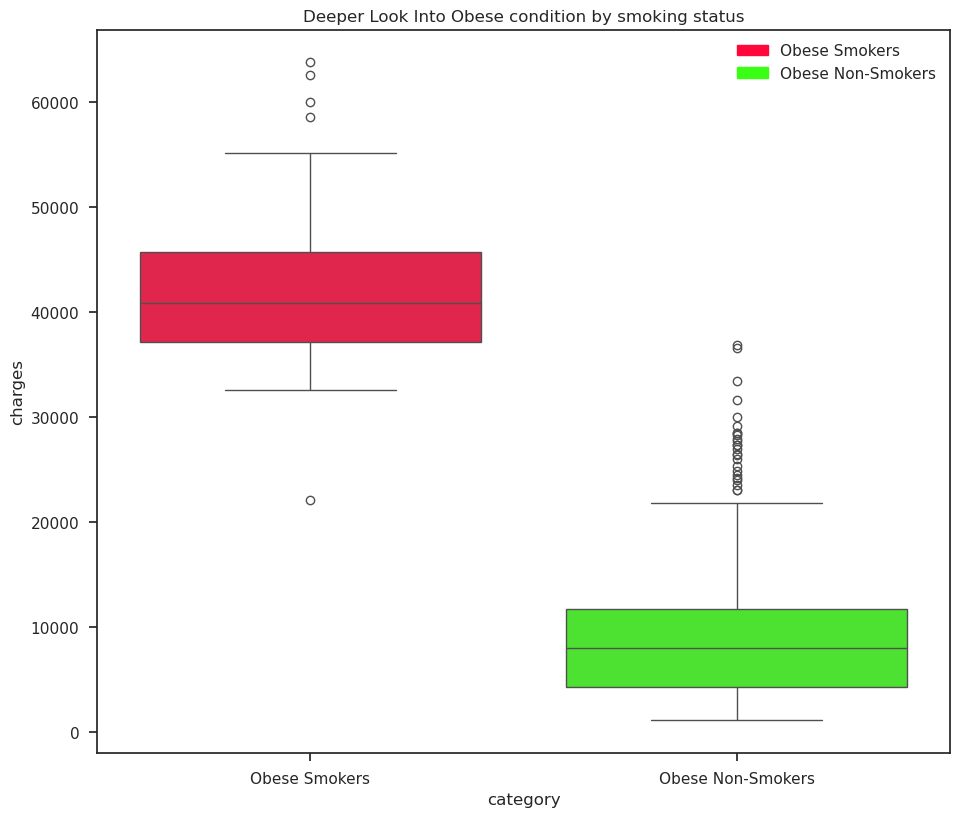

In [97]:
# Hmmm we have to look closer into Obese there is an obvious difference
import matplotlib.patches as mpatches

chargedist_sm = df['charges'].loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'yes')].values

chargedist_nsm = df['charges'].loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'no')].values


values = [chargedist_sm, chargedist_nsm]
categories = ['Obese Smokers', 'Obese Non-Smokers']

custom_palette_box ={
    'Obese Non-Smokers' : '#39FF14',
    'Obese Smokers' : '#FF073A' 

}

df_plot = pd.DataFrame()

for category, values in zip(categories,values):
    df_temp = pd.DataFrame({'category': category, 'charges': values})
    df_plot = pd.concat([df_plot, df_temp])

handle1 = mpatches.Patch(color='#FF073A', label='Obese Smokers')
handle2 = mpatches.Patch(color='#39FF14', label='Obese Non-Smokers')

sns.boxplot(data=df_plot, x='category', y='charges', palette =custom_palette_box )
plt.title('Deeper Look Into Obese condition by smoking status')
plt.legend(handles=[handle1, handle2])

### Seperation in charges between Obese Smokers vs Non-Obese Smokers

In this chart we can visualize how can **separate** obese smokers and obese non-smokers into different **cluseter** of groups. Therefore, we can say that smoking is a **characteristic** that definitely affects patient's chrages

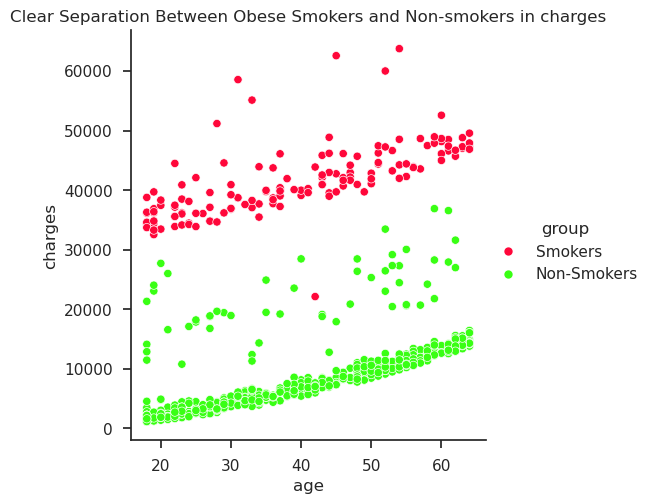

In [98]:
# Create a scatter plot with all the Obese

obese_smoker = df.loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'yes')]

obese_nonsmoker = df.loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'no')]


obese_data = pd.concat([obese_smoker.assign(group='Smokers'), obese_nonsmoker.assign(group='Non-Smokers')])
obese_data

sns.relplot(
    x='age', 
    y='charges', 
    hue='group', 
    data=obese_data, 
    kind='scatter', 
    palette={
        'Smokers': '#FF073A', 
        'Non-Smokers': '#39FF14'
    });
plt.title('Clear Separation Between Obese Smokers and Non-smokers in charges');

### Average Patient Charge by Region:
* **Median Patient Charges**: The **NorthEast** is the region that pays the most on average while the **SouthWest** is the one that pays.
* **Obese group**: From the obese group, the Southwest is the region where obese patients pay the most..
* **Overweight**: From the obese group, the NorthWest is the region where obese patients pay the most.
* **Normal Weight**: From the obese group, the southEast is the region where obese patients pay the most.
* **Underweight**: From the obese group, the NorthWest is the region where obese patients pay the most.

In [99]:
df.head()

# Average charge by Region

df['region'].unique()

# Median charge per Region
southwest = np.median(df['charges'].loc[df['region'] == 'southwest'].values)
southeast = np.median(df['charges'].loc[df['region'] == 'southwest'].values)
northwest = np.median(df['charges'].loc[df['region'] == 'northwest'].values)
northeast = np.median(df['charges'].loc[df['region'] == 'northeast'].values)

lst = [southwest, southeast, northwest, northeast]

data = [go.Scatterpolar(
    r = [southwest, southeast, northwest, northeast],
    theta = ['Southwest', 'Southeast', 'Northwest', 'Northeast'],
    fill = 'toself'
)]

layout = go.Layout(
    title = dict(
        text = 'Median Charged to Patients by Region', 
        x = 0.5
    ),
    paper_bgcolor= 'rgb(255, 255, 224)',
    polar= dict(
        radialaxis = dict(
            visible = True,
            range = [0, max(lst)],
        )
    ),
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = 'radar/basic')

Average Charge by Region depending on the Weight Condition:

In [100]:
# Weight Condition by Region Radar plots

df["weight_condition"].unique()

# Average charges for overweight patients by region 
sw_overweight = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Overweight")].values)
se_overweight = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Overweight")].values)
nw_overweight = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Overweight")].values)
ne_overweight = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Overweight")].values)

# Obese
sw_obese = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Obese")].values)
se_obese = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Obese")].values)
nw_obese = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Obese")].values)
ne_obese = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Obese")].values)

# Normal Weight
sw_nw = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Normal Weight")].values)
se_nw = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Normal Weight")].values)
nw_nw = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Normal Weight")].values)
ne_nw = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Normal Weight")].values)

# Underweight
sw_uw = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Underweight")].values)
se_uw = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Underweight")].values)
nw_uw = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Underweight")].values)
ne_uw = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Underweight")].values)

# Labels
weight_labels = df["weight_condition"].unique().tolist()

# List per weight condition
sw_weights = [sw_overweight, sw_obese, sw_nw, sw_uw]
se_weights = [se_overweight, se_overweight, se_nw, se_uw]
nw_weights = [nw_overweight, nw_overweight, nw_nw, nw_uw]
ne_weights = [ne_overweight, ne_overweight, ne_nw, ne_uw]

data = [
    go.Scatterpolar(
        mode = 'lines+markers',
        r = sw_weights,
        theta = weight_labels,
        fill = 'toself',
        name = 'SouthWest',
        line = dict(
            color="rgba(0, 128, 128, 0.95)"
        ),
        marker = dict(
            color = 'rgba(0, 74, 147, 1)',
            symbol = 'square',
            size =8
        ),
        subplot = 'polar'
    ), 
    go.Scatterpolar(
        mode = 'lines+markers',
        r = sw_weights,
        theta = weight_labels,
        fill = 'toself',
        name = 'SouthWest',
        line = dict(
            color="rgba(255, 72, 72, 0.95)"
        ),
        marker = dict(
            color = 'rgba(219, 0, 0, 1)',
            symbol = 'square',
            size =8
        ),
        subplot = 'polar2'
    ),   
    go.Scatterpolar(
        mode = 'lines+markers',
        r = sw_weights,
        theta = weight_labels,
        fill = 'toself',
        name = 'NorthWest',
        line = dict(
            color="rgba(72, 255, 72, 0.95)"
        ),
        marker = dict(
            color = 'rgba(0, 147, 74, 1)',
            symbol = 'square',
            size =8
        ),
        subplot = 'polar3'
    ),
    go.Scatterpolar(
        mode="lines+markers",
        r = ne_weights,
        theta = weight_labels,
        fill = 'toself',
        name="NorthEast",
        line=dict(
            color="rgba(247, 133, 11, 0.95)"
        ),
        marker=dict(
            color="rgba(245, 168, 86, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar4"
    )
]

layout = go.Layout(
     title = dict(
        text = "Average Patient Charges <br> by Region <br>(Depending on the Patient's Weight Condition)", 
        x = 0.5
    ),
    showlegend = False,
    paper_bgcolor = 'rgb(252, 234, 161)',
    polar = dict(
        domain = dict(
            x = [0, 0.46],
            y = [0.56, 1]
        ),
        radialaxis = dict(
            tickfont = dict(
                size = 6
            )
        ),
        angularaxis = dict(
            tickfont = dict(
                size = 8
            ),
            rotation = 40,
            direction = 'clockwise'
        )
    ),
    polar2 = dict(
      domain = dict(
        x = [0, 0.46],
        y = [0, 0.44]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ),
    polar3 = dict(
      domain = dict(
       x = [0.54, 1],
        y = [0.56, 1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ),
      polar4 = dict(
      domain = dict(
        x = [0.54, 1],
        y = [0, 0.44]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    )
)

fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height = 800, width = 800)
iplot(fig, filename = 'polar/directions')

## unsupervised Learning: 

### Performing Clustering in a Manuel Way:
In the first plot we will do a cluster analysis in a manual form and see what our eyes can discover.
Here are the folliwin results from the manual cluster analysis performed. 

* **Age and Charges**: We can see there is a slight increase in charges depending on the age of the patient. 
* **Obese Cluster** we can see that for each age group there are clusters of the obese group in the top part of charges. 
* **Are these clusters smokers?** As seen in the right chart, most of this clusters are definitely smokers. 

This is somewhat the same as we have explored in the previous section, but I wanted to add the factor of **age** to see until what extent this variable patient's charges. Nevertheless, we can still confirm that being obese and a smoker is the **grand major** factor at least for the group of obese and overweight patients.



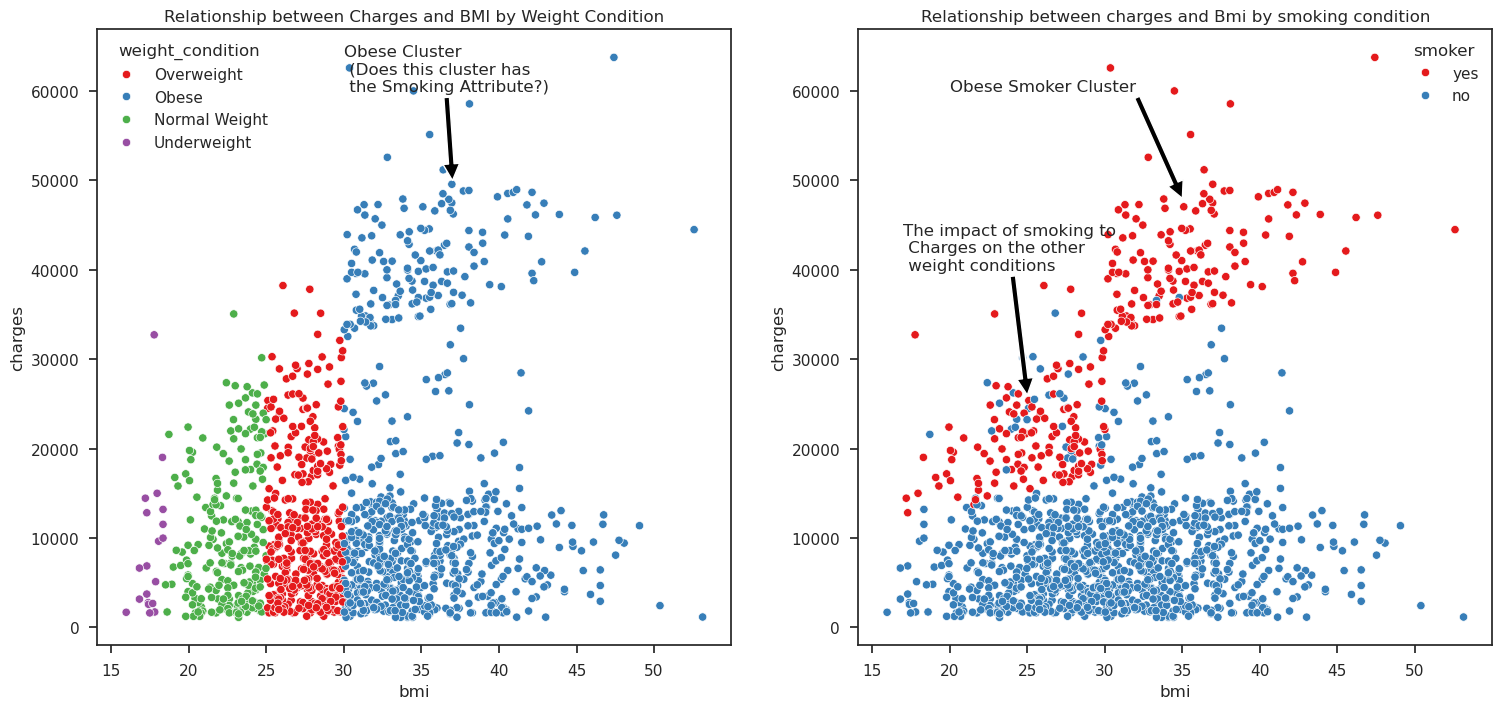

In [101]:
# Two subplots one with weight condition and the other with smoker

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
sns.scatterplot(data=df, ax=ax1, x='bmi', y='charges', hue='weight_condition', palette='Set1');
ax1.set_title("Relationship between Charges and BMI by Weight Condition")
ax1.annotate(
    'Obese Cluster \n (Does this cluster has \n the Smoking Attribute?)',
    xy=(37, 50000),
    xytext=(30, 60000),
    arrowprops=dict(facecolor='black'),
    fontsize=12
)

sns.scatterplot(data=df, ax=ax2, x='bmi', y='charges', hue='smoker', palette='Set1');
ax2.set_title('Relationship between charges and Bmi by smoking condition')
ax2.annotate(
    'Obese Smoker Cluster',
    xy=(35,48000),
    xytext=(20, 60000),
    arrowprops=dict(facecolor='black'),
    fontsize=12
)
ax2.annotate(
    'The impact of smoking to \n Charges on the other \n weight conditions',
    xy=(25, 26000),
    xytext=(17,40000),
    arrowprops = dict(facecolor='black'),
    fontsize=12
);

### Understanding Kmeans clustering

![a](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif)

### Before We start explaining the Elbow Method and K-means Neighbors.
The elbow method is mostly used in unsupervised learning algorithms to determine the **the optimal number of cluster** that should be used to find specific unknown groups within our population. We used the **yellowbrick** library to implement a simple elbow method and to determine the appropiate number of clusters in our KMeans algorithm

### Terms to know: 

* **Cluster Centroides**:  The cluster centroid is the most representative point of a specific cluster. So, if we decide to find three clusters, we will have three cluster centroid.
* **Euclidean Distance**:  Is the distance between two data points and this term is essential when gathering the distance between the cluster centroids and the data points.
* **Elbow Method**:  The elbow method is a technique used to choose the most optimal number of clusters. Remember, in Kmeans clustering we add the number of clusters in a manual way, so the elbow method is useful when using Kmeans. Why is it called the Elbow method? Because as more iterations run to find the optimal number of clusters, the line will take the shape of the arm and the optimal number of clusters is the point that is in the elbow part of the arm.

### Euclidean Distance Formula:

$$  d(x, y) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}  $$

where: 
- $x_1 = $ X-axis value of data observation
- $x_2 = $ X-axis value of the cluster centroid
- $y_1 = $ Y-axis value of the data observation.
- $y_2 = $ Y-axis value of the cluster centroid.

### Explaining the Elbow Method: 

The elbow method finds the average sum of squares distance between the cluster centroid and the data observations. As the number of cluster increases the average sum of squares decreases. Basically, as the number of clusters increases, the distance between the data points and the centroids decreases as well. Whenever, we see the "elbow" that is a rule of thumb to consider the optimal number of clusters.

### How the Elbow method looks like:


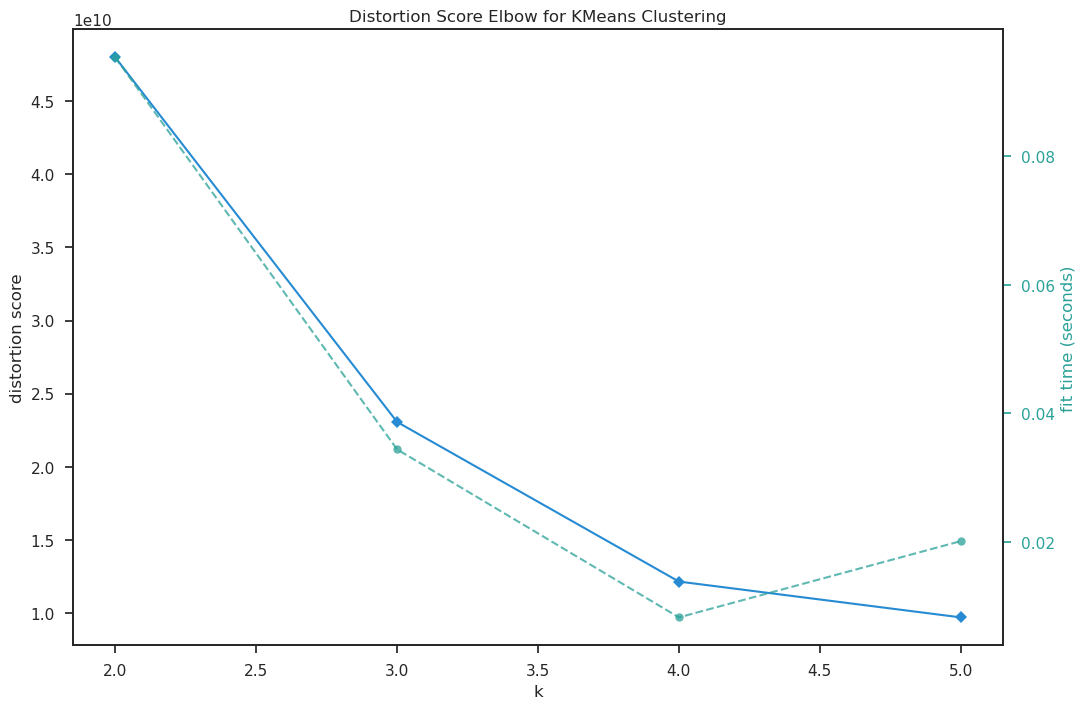

In [102]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
df.head()
original_df.head()

X = df[["bmi", "charges"]]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();  

In [103]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [104]:
# Printing the centroids
print(kmeans.cluster_centers_)

[[3.04997317e+01 6.60918399e+03]
 [3.50239172e+01 4.10979122e+04]
 [2.86664739e+01 1.96614470e+04]]


In [105]:
print(kmeans.labels_)

[2 0 0 ... 0 0 2]


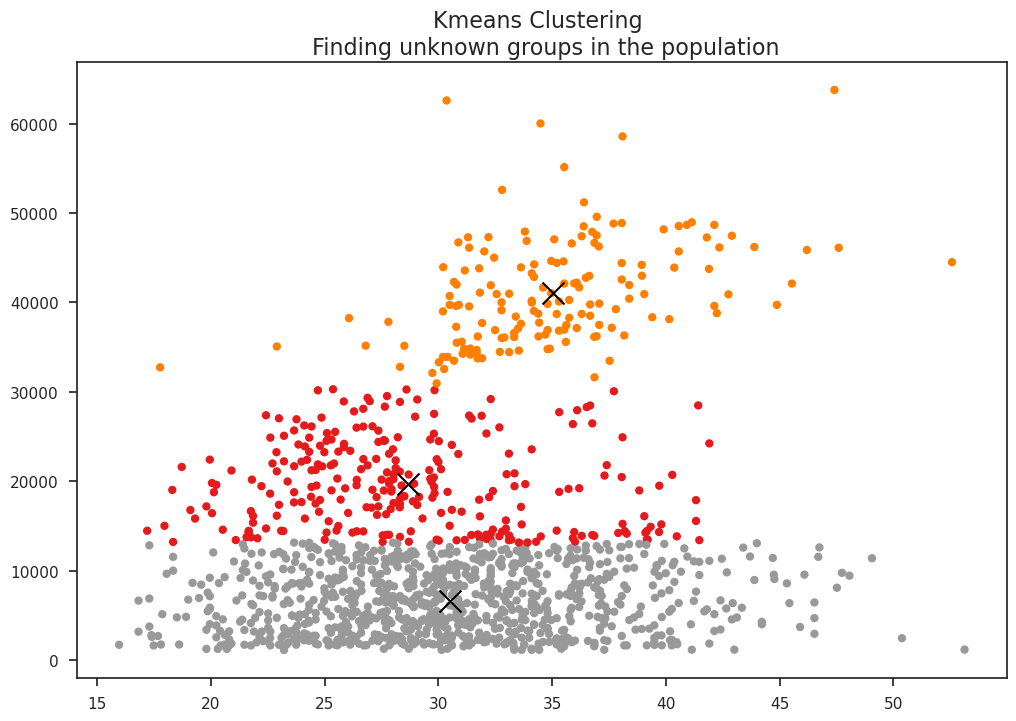

In [106]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap='Set1_r', s=25)
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1], 
    color='black',
    marker='x',
    s=250
);
plt.title('Kmeans Clustering \n Finding unknown groups in the population', fontsize = 16);
plt.show()


### Adding more Clusters with Hierarchical Clustering

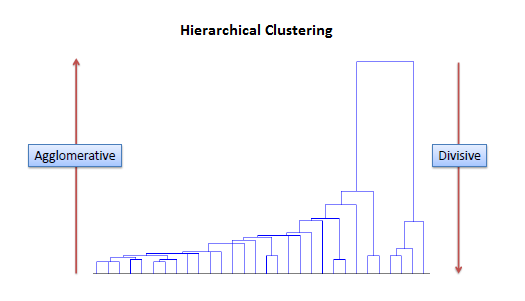

We use a dedogram as show above how two clusters are merged into one big cluster

**Twoo types of Approaches:** 

* **Agglomerative (bottom-up)**:  Each observation starts as **one cluster**. Based on the distance of those clusters (in this case observations) it will **merge** into one cluster. For instance, let's say observation A (Cluster A) and observation B (Cluster B) are two different clusters that are within a close distance. So in essence, it combines the two nearest clusters into one bigger cluster. Remember, as with K-Means clustering each cluster is represented by the centroid which is the average position of the data points (observations). Then each centroid will merge either with other centroids from other clusters or with individual observations which are considered to be individual clusters.
* **Divise (Top-Bottom)**:With this approach we start at the top with one big cluster. The cluster will be partitioned at a point where it splits the big cluster into two big ones and it will run K-means into each of the clusters splitting the data further down. This will get to a point where the observations cannot be split any more since each observation becomes its own cluster. If you want to understand more about K-means look at the previos example at the top of hierarchical clustering. In practice, the divisive method is not used as often as the Agglomerative method.

### What does the dendogram represent?
To make thing simple starting from the bottom, each leaf means that two observations or clusters have been merged into one bigger cluster like we explained in the Agglomerative approach. In other words it shows the "hierarchical" relationship between the clusters.

In [107]:
from sklearn.cluster import AgglomerativeClustering

X = df[['bmi', 'charges']]

agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(X)
agglomerative_clustering

AgglomerativeClustering(n_clusters=4)

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 5% of the data 
sample_df = df.sample(frac=0.05)

sample_X = sample_df[['bmi', 'charges']]

sample_agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(sample_X)
sample_agglomerative_clustering

linked = linkage(sample_X.values, 'single')

In [109]:
agglomerative_clustering.labels_

array([2, 3, 3, ..., 3, 3, 2])

In [110]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


(66, 4)
67


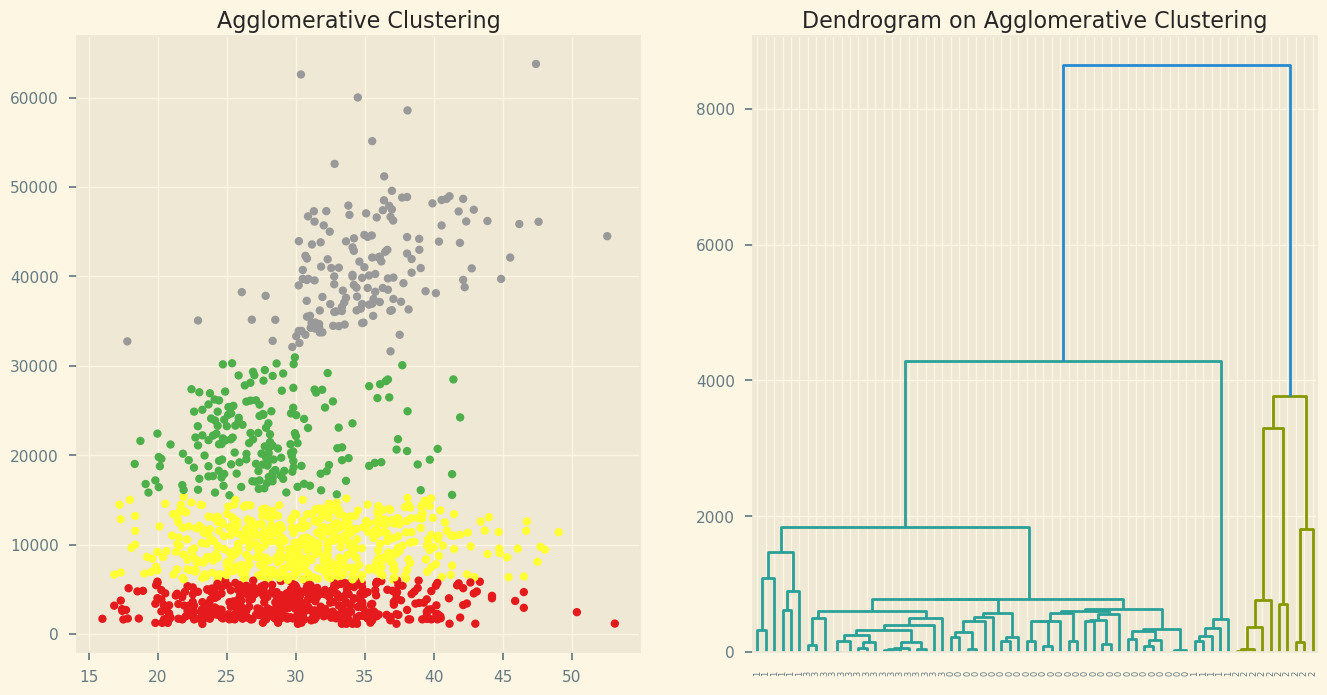

In [111]:
plt.style.use('Solarize_Light2')

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))

ax1.scatter(
    X.values[:,0], 
    X.values[:,1], 
    c=agglomerative_clustering.labels_, 
    cmap='Set1_r', 
    s=25
);
ax1.set_title('Agglomerative Clustering', fontsize = 16);

dendrogram(
    linked,
    orientation='top',
    labels=sample_agglomerative_clustering.labels_,
    distance_sort='descending',
    show_leaf_counts=True,
    ax=ax2
)
ax2.set_title('Dendrogram on Agglomerative Clustering', fontsize = 16);
print(linked.shape)
print(len(sample_agglomerative_clustering.labels_))

**Stress Levels (Will elaborate further on this new feature)**

In [112]:
# BMI + Children / age
df['stress_level'] = df['children'] * df['age'] / df['bmi']

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,charge_status,stress_level
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,Above Average,0.000000
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese,Below Average,0.533017
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese,Below Average,2.545455
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight,Above Average,0.000000
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight,Below Average,0.000000


**Correlations and Bivariate Analysis**:

In [113]:
corr = df.corr(numeric_only=True)

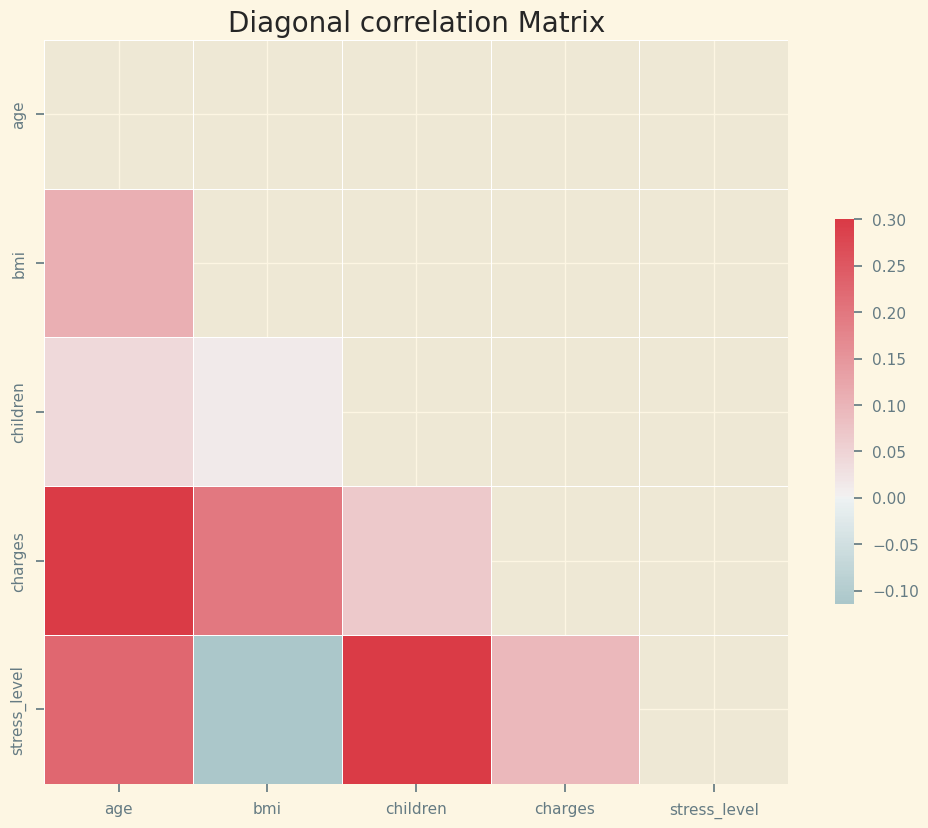

In [114]:
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(202, 10, as_cmap=True)

# Draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask = mask,
    cmap = cmap,
    vmax = .3,
    center = 0,
    square = True,
    linewidths = .5,
    cbar_kws = {'shrink':.5}
);
plt.title('Diagonal correlation Matrix', fontsize=20);

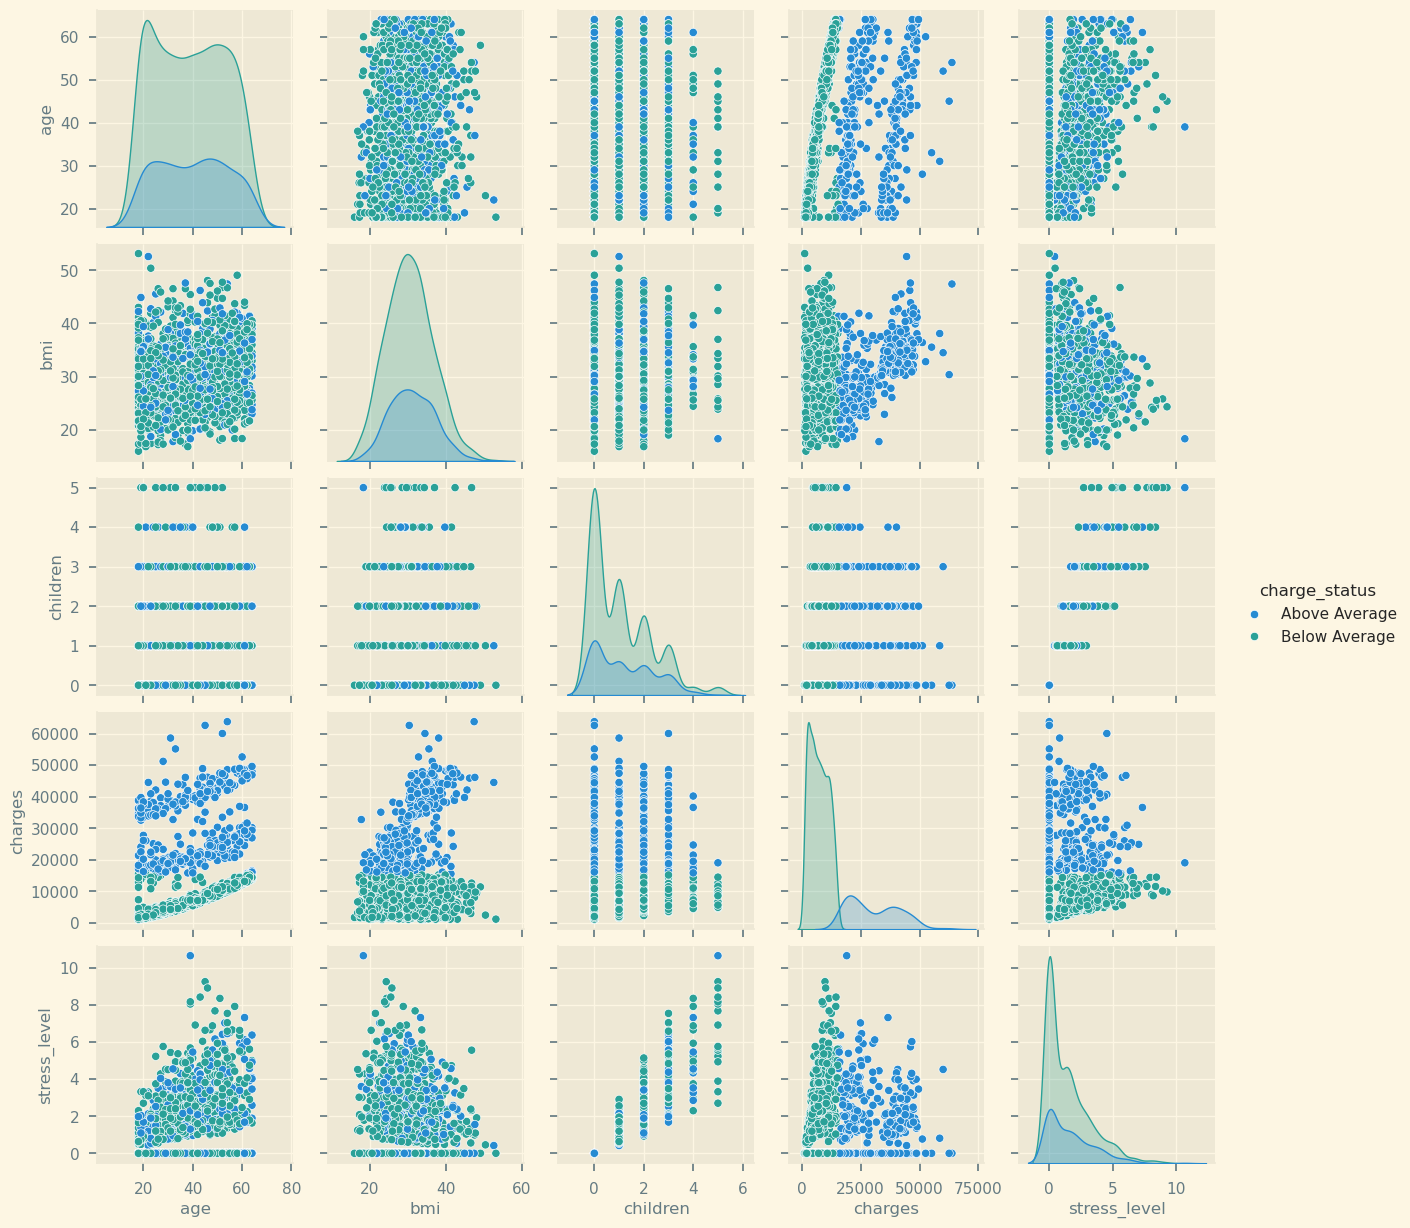

In [115]:
sns.pairplot(df, hue='charge_status');

### Preprocessing our Data and using Pipelines: 

In this section we will preprocess our data using what we call **Pipelines**. So why do we use pipelines? Althought, in this example pipelines might not be necessary if you want to automate various processes for instance, scaling the features, replacing missing values with the median and other processes pipelines are fantastic because they automatize the whole process. We will also use the class CategoricalEncoder from Scikit-Learn, the should already have it as a class but in this case I just copied the class from Scikit-Learn's library. Let's see how it works!

In [116]:
# In this section we will preprocess our data
# First we should split our original data. 

from sklearn.model_selection import train_test_split

# Shuffle our dataset before splitting

original_df = original_df.sample(frac = 1, random_state =1) # frac=1 se toma el 100% de las filas

X = original_df.drop('charges', axis=1)
y = original_df['charges']

# Split into both training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [117]:
# X_train["children"] = X_train["children"].astype("object")
# numerics = X_train.select_dtypes(exclude="object").columns.tolist()
# categoricals = X_train.select_dtypes(include="object").columns.tolist()

In [118]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler,OneHotEncoder
# from sklearn.compose import ColumnTransformer

# # from sklearn.pipeline import FeatureUnion

# numeric_pipeline = Pipeline(steps = [
#     ('scaler', StandardScaler()),
# ])

# categorical_pipeline  = Pipeline(steps = [
#     ('onehot', OneHotEncoder()),
# ])

# preprocessor = ColumnTransformer(
#     transformers = [
#         ('num', numeric_pipeline, numerics),
#         ('cat', categorical_pipeline, categoricals)
#     ]
# )

# scaled_xtrain = preprocessor.fit_transform(X_train)
# scaled_xtrain

In [119]:
# # Let's create the training set by combining the previous X_train and y_train.
# train = X_train.join(y_train, lsuffix='_X_train', rsuffix='_y_train')
# test = X_test.join(y_test, lsuffix='_X_test', rsuffix='_y_test')

# # Random seed
# np.random.seed(42)

# # Shuffle Randomly the training set
# train = train.sample(frac=1)
# train.head()

In [120]:
# X_train = sm.add_constant(scaled_xtrain)
# y_train = y_train.values

# model = sm.OLS(y_train, X_train)
# results = model.fit()
# print(results.summary())

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [122]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
#CategoricalEncoder
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding="onehot-dense"):
        self.encoding = encoding
        self.encoder = OneHotEncoder()

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X):
        return self.encoder.transform(X).toarray() if self.encoding == "onehot-dense" else self.encoder.transform(X)

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import FeatureUnion

# Children as categorical (ordinal varibale)
X_train["children"] = X_train["children"].astype("object") 

# Separate numerics and categorical values
numerics = X_train.select_dtypes(exclude="object")
categoricals = X_train.select_dtypes(include="object")

# Pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numerics.columns.tolist())),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline =  Pipeline([
    ("select_numeric", DataFrameSelector(categoricals.columns.tolist())),
    ("std_scaler", CategoricalEncoder(encoding="onehot-dense")),
])

main_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numerical_pipeline),
    ('cat_pipeline', categorical_pipeline)
])

# Scale our features from our training data
scaled_xtrain = main_pipeline.fit_transform(X_train)


### Statistics: 

**Linear Models**:
In this section I used the statsmodels library to share with the community some important statistical measures I will give a brief definition to the concepts in which I consider are the most important in this case.

**Terms:**

* **Adjusted R-Squared:** This tells us how close are our data points to the regression line (our predictions). The higher the adjusted squared, the higher the accuracy of our prediction line.
* **Skewness:** This tells us whether the distribution is symetric (at 0 or closer to 0), Right-Skewed which means that most of the values are to the left (Skewness statistic becomes larger) and Left skewed most observations are to the right (this means that the skewness statistic is in the negative zone.)
* **Kurtosis:** Is a statistical measure that helps us understand how skew is the distribution and the peakedness of our data. In this case we have a kurtosis greater than zero which means that the peak is wider with heavier tails, meaning there are some outliers in the observation.
* **Skew:** Our skewness is greater than zero which means that it is positive skew. Meaning that most observations are concentrated in the low section of the distribution.
* **Collinearity**: Collinearity basically means that when two independent variables are highly correlated, it is hard to determine the real coefficients on each feature. Why is this important? Well, if we want to know how much weight that independent variable has towards predicting a specific value colinearity should be avoided.

### More on R-Square and Adjusted R-Square:

* **What does R-Square assumes?** That every independent variable in the model explains the different levels of variations in the dependent variable (including the redundant independent variables.) The more variables you add to the model, the more the R-Square will increase independently of how much significance the variable adds to the model.
* **Why Adjusted-R Squared?** To make things simple, adjusted-R Squared only uses the variables that adds significance to our model. This is one of the main reasons why we used adjusted R-squared rather than R-squared as a measure of performance of our model.

### More on Collinearity:

* **Does Collinearity affect the final value of our predictions?** The answer is no (well at least most of the time does not affect the value of the predictions) however, collinearity prevents us from understanding the true coefficients of the independent variables which is important if we want to better understand how much weight the independent variables have towards a dependent variable.
* **What do we do to avoid collinearity?** First step, is to determine which variables are highly correlated and then decide which independent variable to choose for inclusion into our regression model.
* **Why is determining collinearity important?** When we find a high correlation between two features, this assumes that they are measuring the same label (output). So removing one of those features does not have a negative impact in the performance of our model and it makes our model simpler. Collinearity is solved by dropping those features that are highly correlated.

**Formulas**



In [124]:
# Let's create the training set by combining the previous X_train and y_train.
train = X_train.join(y_train, lsuffix='_X_train', rsuffix='_y_train')
test = X_test.join(y_test, lsuffix='_X_test', rsuffix='_y_test')

# Random seed
np.random.seed(42)

# Shuffle Randomly the training set
train = train.sample(frac=1)
train.head()

,age,sex,bmi,children,smoker,region,charges
1218,46,female,34.600,1,yes,southwest,41661.60200
1164,41,female,28.310,1,no,northwest,7153.55390
462,62,female,38.095,2,no,northeast,15230.32405
435,60,male,33.110,3,no,southeast,13919.82290
845,60,female,32.450,0,yes,southeast,45008.95550


In [125]:
X_train = sm.add_constant(scaled_xtrain)
y_train = y_train.values

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     276.6
Date:                Thu, 06 Jun 2024   Prob (F-statistic):          7.42e-316
Time:                        16:29:38   Log-Likelihood:                -10830.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1057   BIC:                         2.175e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8568.9532    166.644     51.421      0.0

In [126]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 8568.95322987  3576.63789811  2179.92375313  4310.64223139
  4258.31099847   560.02799665   720.12034587  1911.74881677
  1248.77259526  2707.14129959  1421.14217572 -7595.37255538
 16164.32578525  2803.23144536  2407.55582242  1517.32621754
  1840.83974455]
R2:  0.7584480255357673


In [127]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     276.6
Date:                Thu, 06 Jun 2024   Prob (F-statistic):          7.42e-316
Time:                        16:30:13   Log-Likelihood:                -10830.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1057   BIC:                         2.175e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8568.9532    166.644     51.421      0.0